<h1> Machine Learning Project on Speech Emotion Recognition </h1>

<h5> Installing Prerequisites and Libraries </h5>

In [3]:
pip install pipwin

  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13709 sha256=4a67a5aa38a6ddbd293c38b2c1d52786025886c8ace869f245f09edd45525bd2
  Stored in directory: C:\Users\palak\AppData\Local\pip\Cache\wheels\9b\04\dd\7daf4150b6d9b12949298737de9431a324d4b797ffd63f526e
  Created wheel for pyjsparser: filename=pyjsparser-2.7.1-cp37-none-any.whl size=26004 sha256=458a65519619b650b493a24d7b0b56eac4cf5a7c2849a0be5d0b12decf04a766
  Stored in directory: C:\Users\palak\AppData\Local\pip\Cache\wheels\a2\73\e6\3e433f3fd78257c3f971baf8cc9001cc0c4797268c61751e89
Successfully built docopt pyjsparser
  Found existing installation: beautifulsoup4 4.8.0
    Uninstalling beautifulsoup4-4.8.0:
      Successfully uninstalled beautifulsoup4-4.8.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install soundfile

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


<h5> Importing Libraries </h5>

In [1]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
from sklearn import metrics

<h5> Creating Python Function to Extract Features </h5>

<h6> Extracting 3 features (mfcc,chroma,mel) from the sound file and storing them in result array. </h6>

In [2]:
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

<h5> Creating emotions as the target variable </h5>

In [3]:
#Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

<h5> Loading the audio files and extracting features from each one </h5>

In [4]:
#Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("C:\\Users\\palak\\Downloads\\speech-emotion-recognition-ravdess-data\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

<h5> Model 1: Multi Layer Perceptron </h5>

In [5]:
#Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.20)

In [6]:
#Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(614, 154)


In [7]:
#Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [8]:
#Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [9]:
#Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [10]:
y_train_pred = model.predict(x_train)

In [11]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_train, y_pred=y_train_pred)
#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 98.21%


In [8]:
#Predict for the test set
y_pred=model.predict(x_test)

In [18]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 77.27%


<h5> Model 2: Naive Bayes </h5>

In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
x_train5,x_test5,y_train5,y_test5 =load_data(test_size=0.30)

In [14]:
clf = GaussianNB() 
clf.fit(x_train5, y_train5)

GaussianNB()

In [15]:
y_train_predict = clf.predict(x_train5)

In [17]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_train5, y_pred=y_train_predict)
#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 47.67%


In [16]:
y_predict = clf.predict(x_test5)
print(y_predict)

['calm' 'calm' 'disgust' 'disgust' 'disgust' 'calm' 'calm' 'fearful'
 'calm' 'disgust' 'fearful' 'calm' 'fearful' 'disgust' 'calm' 'fearful'
 'calm' 'calm' 'disgust' 'calm' 'calm' 'disgust' 'calm' 'calm' 'calm'
 'calm' 'calm' 'happy' 'calm' 'calm' 'disgust' 'disgust' 'happy' 'calm'
 'disgust' 'calm' 'calm' 'happy' 'calm' 'calm' 'disgust' 'calm' 'calm'
 'calm' 'disgust' 'calm' 'calm' 'calm' 'calm' 'happy' 'fearful' 'fearful'
 'calm' 'happy' 'disgust' 'disgust' 'calm' 'disgust' 'calm' 'calm' 'calm'
 'calm' 'calm' 'calm' 'calm' 'calm' 'calm' 'disgust' 'calm' 'disgust'
 'calm' 'happy' 'fearful' 'fearful' 'fearful' 'calm' 'disgust' 'calm'
 'calm' 'fearful' 'calm' 'calm' 'disgust' 'calm' 'disgust' 'calm' 'calm'
 'disgust' 'disgust' 'calm' 'disgust' 'calm' 'calm' 'happy' 'calm'
 'fearful' 'calm' 'calm' 'calm' 'calm' 'fearful' 'calm' 'calm' 'calm'
 'calm' 'calm' 'calm' 'calm' 'calm' 'happy' 'calm' 'calm' 'disgust' 'calm'
 'happy' 'calm' 'calm' 'happy' 'disgust' 'disgust' 'calm' 'calm' 'calm'
 

In [48]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test5, y_pred=y_predict)
#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 50.65%


<h5> Model 3: Support Vector Machine </h5>

In [ ]:
from sklearn import svm

In [19]:
x_train1,x_test1,y_train1,y_test1=load_data(test_size=0.20)

In [20]:
svc=svm.SVC(probability=False, kernel="linear")
svc.fit(x_train1,y_train1)

SVC(kernel='linear')

In [21]:
print("Accuracy:", metrics.accuracy_score(svc.predict(x_train1), y_train1))

Accuracy: 0.8811074918566775


Accuracy: 0.6493506493506493
Weights :  [[-1.91796575e-02 -4.55569145e-04  4.06501623e-03 ... -9.98238576e-04
  -5.55466240e-04 -3.16405399e-04]
 [-2.42783785e-02  4.44300626e-01  2.40838525e-02 ... -9.76933099e-04
  -6.15721510e-04 -2.95832109e-04]
 [-2.72719410e-02  5.77914980e-02  7.95764935e-02 ...  3.13502768e-05
   1.65631377e-04  1.18986278e-05]
 [ 2.19629927e-02  1.73667330e-01 -1.21148476e-02 ...  6.81601997e-03
   5.56782207e-03  2.05932524e-03]
 [ 2.38566561e-02  8.94981972e-02  1.60132420e-01 ...  5.01689655e-03
   5.15010434e-03  1.82469260e-03]
 [-9.38041282e-03 -1.34856615e-01  1.84477632e-01 ...  1.88132047e-03
   2.72117694e-03  2.17024137e-03]]


C:\Users\palak\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


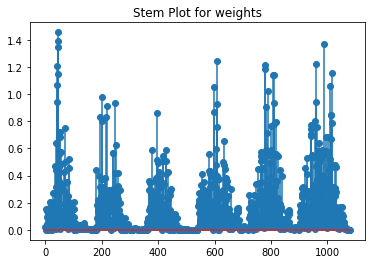

In [26]:
print("Accuracy:", metrics.accuracy_score(svc.predict(x_test1), y_test1))
weights=abs(svc.coef_.flatten())
print("Weights : ",svc.coef_)
plt.stem(weights)
plt.title("Stem Plot for weights")
plt.show()

<h5> Model 4: Logistic Regression </h5>

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
x_train3,x_test3,y_train3,y_test3=load_data(test_size=0.30)

In [24]:
model = LogisticRegression(C = 0.4,penalty='l1', solver='liblinear')
model.fit(x_train3, y_train3)

LogisticRegression(C=0.4, penalty='l1', solver='liblinear')

In [25]:
y_train_hat = model.predict(x_train3)

In [26]:
print("Accuracy:", metrics.accuracy_score(y_train3, y_train_hat))

Accuracy: 0.7635009310986964


In [28]:
import pandas as pd 
from sklearn import metrics

In [12]:
y_pred = pd.Series(model.predict(x_test3))

In [55]:
print("Accuracy:", metrics.accuracy_score(y_test3, y_pred))

Accuracy: 0.6536796536796536


Weights :  [[-3.13460442e-03  2.08264086e-02  6.24715444e-02  2.67244947e-02
   9.30508111e-02  1.72796186e-02 -1.39103932e-02  9.18440767e-02
   3.26424403e-02  4.47236603e-02 -1.18417646e-01 -9.33457523e-02
   4.45592630e-02 -8.82141650e-02  0.00000000e+00 -4.92850354e-02
   6.66702692e-02 -9.19800231e-02 -1.19674156e-01  1.25390657e-01
  -2.29955980e-05 -9.99041864e-03 -1.64677235e-01  0.00000000e+00
  -4.44993143e-02  0.00000000e+00  1.44752957e-02 -1.01683924e-02
  -2.63874014e-04  3.98103405e-02  5.54130278e-02  7.18813321e-02
   4.35426253e-02  6.40345100e-02  3.14019605e-01 -5.43894551e-01
   1.43032746e-01  7.58382024e-04 -2.98161640e-01  0.00000000e+00
   0.00000000e+00 -3.64859101e+00  0.00000000e+00 -3.99363374e-01
   0.00000000e+00 -1.67157080e+00 -1.38307708e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00

   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]


C:\Users\palak\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


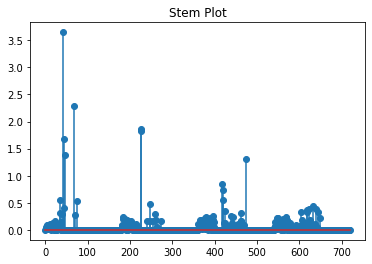

In [15]:
weights=model.coef_.flatten()
print("Weights : ",model.coef_)
plt.stem(abs(weights))
plt.title("Stem Plot")
plt.show()

<h5> Testing Accuracy Results </h5>

In [30]:
results = {'Model': ["Multi-Layer Perceptron","Support Vector Machine","Logistic Regression","Gaussian Naive Bayes"],
        'Testing Accuracy': [77.27,64.93,65.36,50.65]
          }
df = pd.DataFrame(results, columns = ['Model', 'Testing Accuracy'])
print(df)

                    Model  Testing Accuracy
0  Multi-Layer Perceptron             77.27
1  Support Vector Machine             64.93
2     Logistic Regression             65.36
3    Gaussian Naive Bayes             50.65


<h5> Training Accuracy Results </h5>

In [31]:
results = {'Model': ["Multi-Layer Perceptron","Gaussian Naive Bayes","Support Vector Machine","Logistic Regression"],
        'Training Accuracy': [98.21,47.67,88.11,76.35]
          }
df = pd.DataFrame(results, columns = ['Model', 'Training Accuracy'])
print(df)

                    Model  Training Accuracy
0  Multi-Layer Perceptron              98.21
1    Gaussian Naive Bayes              47.67
2  Support Vector Machine              88.11
3     Logistic Regression              76.35


<h5> Learnings and Observations </h5>

In [38]:
print("1. Multi Layer Perceptron has the highest accuracy with Naive bayes having the least")
print("2. MLP learns the relationship between the noisy and clean feature vectors for input noisy feature vectors.")
print("3. Naive bayes ignores the acoustics and speech percepts")
print("4. SVM is unsuitable for larger datasets")
print("5. logistic regression outputs the conditional probability of a class given an observation and has a natural generalization to the multi-class case. This is important in Speech Emotion Recognition")

1. Multi Layer Perceptron has the highest accuracy with Naive bayes having the least
2. MLP learns the relationship between the noisy and clean feature vectors for input noisy feature vectors.
3. Naive bayes ignores the acoustics and speech percepts
4. SVM is unsuitable for larger datasets
5. logistic regression outputs the conditional probability of a class given an observation and has a natural generalization to the multi-class case. This is important in Speech Emotion Recognition
